## Exercise

1. Load the dataset **`california_housing_train.csv`**.
2. Use the provided model architecture to train the data.
3. Monitor and record both **training loss** and **validation loss** during the training process.
4. Plot the loss curves to visually compare the model’s performance on training and validation data.

### Notes
- Split the dataset into **training** and **validation** sets before training.
- Watch for signs of **overfitting** or **underfitting** in the loss curves.
- Report your final training and validation losses at the end of training.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32, device = device)

x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis = 0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)

x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

In [11]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


In [12]:
from torch import optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

### Exercise: Build a Deep Model to Demonstrate Overfitting

**Instructions:**

You will create a deep fully-connected neural network for a regression task.  
The architecture will be intentionally large compared to the dataset size so that overfitting can be observed.

**Model Architecture:**
- **Input layer**: number of neurons equal to the number of input features (`input_dim`).
- **Hidden Layer 1**: 256 neurons, ReLU activation.
- **Hidden Layer 2**: 128 neurons, ReLU activation.
- **Hidden Layer 3**: 64 neurons, ReLU activation.
- **Hidden Layer 4**: 32 neurons, ReLU activation.
- **Hidden Layer 5**: 16 neurons, ReLU activation.
- **Output Layer**: 1 neuron (no activation).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model **only on the first 100 samples** of the training dataset (`X_train`, `y_train`).
3. Train for a sufficient number of epochs (e.g., 5000) to let the model memorize the training data.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss decreasing close to zero.
   - Validation loss increasing after some point (a clear sign of overfitting).

**Expected Output:**
- A plot with two curves:  
  - **Training loss** continuously decreasing.  
  - **Validation loss** starting low but increasing after some epochs.
- Clear evidence that the model has memorized the small training set instead of generalizing.


In [47]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split

In [55]:
device = "cuda" if torch.cuda.is_available() else "cpu"
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
x = df.drop("median_house_value" , axis=1)
y = df["median_house_value"]
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=.2 , random_state=42)
x_train = x_train[0:100]
y_train = y_train[0:100]


x_train_tensor = torch.tensor(x_train.values , dtype=torch.float , device = device)
y_train_tensor = torch.tensor(y_train.values , dtype=torch.float , device = device).view(-1 , 1)
x_test_tensor = torch.tensor(x_test.values , dtype=torch.float , device = device)
y_test_tensor = torch.tensor(y_test.values , dtype=torch.float , device = device).view(-1 , 1)

x_mu = x_train_tensor.mean(axis=0)
x_std = x_train_tensor.std(axis=0)
y_mu = y_train_tensor.mean(axis=0)
y_std = y_train_tensor.std(axis=0)

y_train_tensor_scaled = (y_train_tensor - y_mu) / (y_std)
x_train_tensor_scaled = (x_train_tensor - x_mu) / (x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu) / (y_std)
x_test_tensor_scaled = (x_test_tensor - x_mu) / (x_std)


In [56]:
class ManualRegresion(nn.Module):
  def __init__(self , input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim , 256)
    self.fc2 = nn.Linear(256 , 128)
    self.fc3 = nn.Linear(128 , 64)
    self.fc4 = nn.Linear(64 , 32)
    self.fc5 = nn.Linear(32 , 16)
    self.fc6 = nn.Linear(16 , 1)
    self.relu = nn.ReLU()


  def forward(self , x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.relu(self.fc4(x))
    x = self.relu(self.fc5(x))
    x = self.fc6(x)
    return x

In [57]:
torch.manual_seed(42)
input_dim = x_train_tensor_scaled.shape[1]
model = ManualRegresion(input_dim).to(device)
lr=0.01
epoches = 10000
optimizer = optim.SGD(model.parameters() , lr=lr)
loss_fn = nn.MSELoss()
train_losses = []
val_losses = []


for n in range(epoches):
  model.train()
  y_pred = model(x_train_tensor_scaled)
  loss_train = loss_fn(y_train_tensor_scaled , y_pred)
  loss_train.backward()
  optimizer.step()
  train_losses.append(loss_train.detach().cpu().item())
  optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    loss_val = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(loss_val.detach().cpu().item())

  if (n + 1) % 500 == 0 or n == 0:
    print(f'Epoch {n + 1}: train loss = {loss_train.detach().cpu().item()}, val loss = {loss_val.cpu().item()}')


Epoch 1: train loss = 1.0202949047088623, val loss = 1.0805134773254395
Epoch 500: train loss = 0.555155873298645, val loss = 0.6630749702453613
Epoch 1000: train loss = 0.08676832169294357, val loss = 0.43813738226890564
Epoch 1500: train loss = 0.04729754477739334, val loss = 0.48257681727409363
Epoch 2000: train loss = 0.028193555772304535, val loss = 0.4826323986053467
Epoch 2500: train loss = 0.017235634848475456, val loss = 0.4872490167617798
Epoch 3000: train loss = 0.010336382314562798, val loss = 0.4825964868068695
Epoch 3500: train loss = 0.007850540801882744, val loss = 0.4827931523323059
Epoch 4000: train loss = 0.005881073419004679, val loss = 0.48675772547721863
Epoch 4500: train loss = 0.006005872972309589, val loss = 0.49403268098831177
Epoch 5000: train loss = 0.0034404408652335405, val loss = 0.47901347279548645
Epoch 5500: train loss = 0.004889133386313915, val loss = 0.49309203028678894
Epoch 6000: train loss = 0.004509409889578819, val loss = 0.4926826059818268
Epo

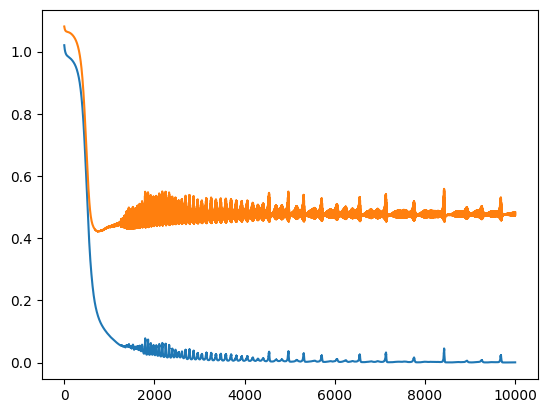

In [58]:
plt.plot(range(epoches), train_losses)
plt.plot(range(epoches), val_losses)
plt.show()

### Exercise: Build a Simple Model to Demonstrate Underfitting

**Instructions:**

You will create an extremely simple neural network for a regression task in order to observe **underfitting**.

**Model Architecture:**
- **Input Layer**: number of neurons equal to the number of input features (`input_dim`).
- **Output Layer**: 1 neuron (no hidden layers, no activation function).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model on the **entire training dataset** (no sample limitation).
3. Use the same training procedure as before (same optimizer and loss function), but **train for fewer epochs** than in the previous exercises.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss remains relatively high.
   - Validation loss also remains high.
   - Both indicate that the model is too simple to capture the complexity of the data (underfitting).

**Expected Output:**
- A loss plot showing minimal improvement over epochs.
- Similar loss values for both training and validation sets, but both being higher than desired.



In [65]:
from sklearn.preprocessing import StandardScaler

device = "cuda" if torch.cuda.is_available() else "cpu"
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
x = df.drop("median_house_value" , axis=1)
y = df["median_house_value"]
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=.2 , random_state=42)


# data scaling

x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train.values.reshape(-1, 1))
y_train = y_scaler.fit_transform(y_train.values.reshape(-1 , 1))
y_test = y_scaler.transform(y_test.values.reshape(-1 , 1))


# convert to pytorch tensors
x_train_tensor = torch.tensor(x_train , dtype=torch.float , device = device)
y_train_tensor = torch.tensor(y_train , dtype=torch.float , device = device)
x_test_tensor = torch.tensor(x_test , dtype=torch.float , device = device)
y_test_tensor = torch.tensor(y_test , dtype=torch.float , device = device)




In [66]:
class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    return x


In [69]:
torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 50
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


Epoch 1: train loss = 0.697185218334198, val loss = 0.6835914850234985
Epoch 10: train loss = 0.6516306400299072, val loss = 0.6388094425201416
Epoch 20: train loss = 0.6174384951591492, val loss = 0.6043758392333984
Epoch 30: train loss = 0.5927644968032837, val loss = 0.5791386961936951
Epoch 40: train loss = 0.5741038918495178, val loss = 0.559846043586731
Epoch 50: train loss = 0.5595171451568604, val loss = 0.5446444749832153


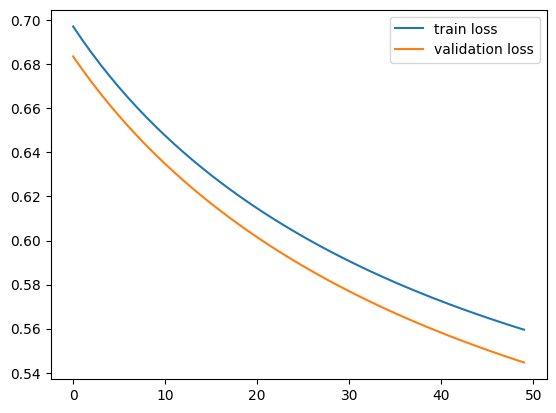